## RF Implementation

I'll compare the standard Decision Trees to RF.

I'll also tune different Hyperparameters and see how they affect my performance metrics, and OOB score.




In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X=data.data
y=data.target

In [2]:
# train-val split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
## baseline decision trees - one full length tree and one depth limited tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train, y_train)


y_train_pred_full = dt_full.predict(X_train)
y_val_pred_full = dt_full.predict(X_val)

y_train_pred_limited = dt_limited.predict(X_train)
y_val_pred_limited = dt_limited.predict(X_val)

y_train_pred_full_accuracy = accuracy_score(y_train, y_train_pred_full)
y_val_pred_full_accuracy = accuracy_score(y_val, y_val_pred_full)

y_train_pred_limited_accuracy = accuracy_score(y_train, y_train_pred_limited)
y_val_pred_limited_accuracy = accuracy_score(y_val, y_val_pred_limited)

# f1 score

y_train_pred_full_f1 = f1_score(y_train, y_train_pred_full)
y_val_pred_full_f1 = f1_score(y_val, y_val_pred_full)

y_train_pred_limited_f1 = f1_score(y_train, y_train_pred_limited)
y_val_pred_limited_f1 = f1_score(y_val, y_val_pred_limited)

# roc auc score

y_train_pred_full_roc_auc = roc_auc_score(y_train, y_train_pred_full)
y_val_pred_full_roc_auc = roc_auc_score(y_val, y_val_pred_full)

y_train_pred_limited_roc_auc = roc_auc_score(y_train, y_train_pred_limited)
y_val_pred_limited_roc_auc = roc_auc_score(y_val, y_val_pred_limited)

print("Full tree - Train Accuracy:", y_train_pred_full_accuracy)
print("Full tree - Validation Accuracy:", y_val_pred_full_accuracy)

print("Limited tree - Train Accuracy:", y_train_pred_limited_accuracy)
print("Limited tree - Validation Accuracy:", y_val_pred_limited_accuracy)

print("Full tree - Train F1 Score:", y_train_pred_full_f1)
print("Full tree - Validation F1 Score:", y_val_pred_full_f1)

print("Limited tree - Train F1 Score:", y_train_pred_limited_f1)
print("Limited tree - Validation F1 Score:", y_val_pred_limited_f1)

print("Full tree - Train ROC AUC Score:", y_train_pred_full_roc_auc)
print("Full tree - Validation ROC AUC Score:", y_val_pred_full_roc_auc)

print("Limited tree - Train ROC AUC Score:", y_train_pred_limited_roc_auc)
print("Limited tree - Validation ROC AUC Score:", y_val_pred_limited_roc_auc)


Full tree - Train Accuracy: 1.0
Full tree - Validation Accuracy: 0.9473684210526315
Limited tree - Train Accuracy: 0.978021978021978
Limited tree - Validation Accuracy: 0.9473684210526315
Full tree - Train F1 Score: 1.0
Full tree - Validation F1 Score: 0.9577464788732394
Limited tree - Train F1 Score: 0.9826388888888888
Limited tree - Validation F1 Score: 0.9583333333333334
Full tree - Train ROC AUC Score: 1.0
Full tree - Validation ROC AUC Score: 0.9439895185063871
Limited tree - Train ROC AUC Score: 0.9740451855836472
Limited tree - Validation ROC AUC Score: 0.9394038650507698


In [4]:
## baseline RF model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_val_pred_rf = rf.predict(X_val)

y_train_pred_rf_accuracy = accuracy_score(y_train, y_train_pred_rf)
y_val_pred_rf_accuracy = accuracy_score(y_val, y_val_pred_rf)

y_train_pred_rf_f1 = f1_score(y_train, y_train_pred_rf)
y_val_pred_rf_f1 = f1_score(y_val, y_val_pred_rf)

y_train_pred_rf_roc_auc = roc_auc_score(y_train, y_train_pred_rf)
y_val_pred_rf_roc_auc = roc_auc_score(y_val, y_val_pred_rf)

print("Random Forest - Train Accuracy:", y_train_pred_rf_accuracy)
print("Random Forest - Validation Accuracy:", y_val_pred_rf_accuracy)
print("Random Forest - Train F1 Score:", y_train_pred_rf_f1)
print("Random Forest - Validation F1 Score:", y_val_pred_rf_f1)
print("Random Forest - Train ROC AUC Score:", y_train_pred_rf_roc_auc)
print("Random Forest - Validation ROC AUC Score:", y_val_pred_rf_roc_auc)

Random Forest - Train Accuracy: 1.0
Random Forest - Validation Accuracy: 0.9649122807017544
Random Forest - Train F1 Score: 1.0
Random Forest - Validation F1 Score: 0.9722222222222222
Random Forest - Train ROC AUC Score: 1.0
Random Forest - Validation ROC AUC Score: 0.9580740255486406


In [5]:
## observations:

#1: full tree is overfitting (perfect train accuract and f1 score, but much lower validation scores) and so is limited tree, but to a lesser extent.
#2: rf however is not overfitting with similar train and validation scores
#3: f1 and roc auc scores (which are more informative for imbalanced datasets) also favour rf over decision trees


Using different Hyperparameters

In [6]:
# using n_estimators

trees = [1,10,50,100,200,250]
rf_val_accuracies = []


for n in trees:

    rf = RandomForestClassifier(n_estimators=n, random_state = 42)
    rf.fit(X_train, y_train)

    rf_train_pred = rf.predict(X_train)
    rf_val_pred = rf.predict(X_val)

    rf_train_pred_accuracy = accuracy_score(y_train, rf_train_pred)
    rf_val_pred_accuracy = accuracy_score(y_val, rf_val_pred)

    rf_val_accuracies.append(rf_val_pred_accuracy)
    print(f"n_estimators: {n} - Train Accuracy: {rf_train_pred_accuracy} - Validation Accuracy: {rf_val_pred_accuracy}")


n_estimators: 1 - Train Accuracy: 0.9582417582417583 - Validation Accuracy: 0.9385964912280702
n_estimators: 10 - Train Accuracy: 0.9978021978021978 - Validation Accuracy: 0.956140350877193
n_estimators: 50 - Train Accuracy: 1.0 - Validation Accuracy: 0.9649122807017544
n_estimators: 100 - Train Accuracy: 1.0 - Validation Accuracy: 0.9649122807017544
n_estimators: 200 - Train Accuracy: 1.0 - Validation Accuracy: 0.9649122807017544
n_estimators: 250 - Train Accuracy: 1.0 - Validation Accuracy: 0.9649122807017544


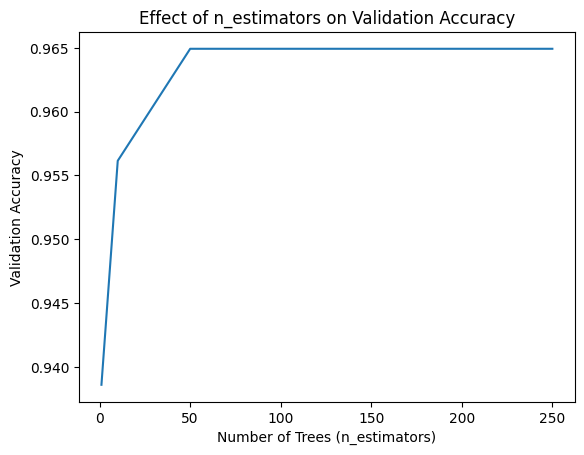

In [7]:
# plotting n_estimators vs validation accuracies

import matplotlib.pyplot as plt

plt.plot(trees, rf_val_accuracies)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Validation Accuracy")
plt.title("Effect of n_estimators on Validation Accuracy")
plt.show()

In [8]:
## observations:
#1. validation accuracies improves for n_estimators 1-50 
#2. after 50, it stays constant at 0.9649 

In [9]:
# using max_depth

depths = [None,1,2,3,4,5,10]
rf_val_accuracies = []

for d in depths:

    rf = RandomForestClassifier(max_depth=d, random_state=42)
    rf.fit(X_train, y_train)

    rf_train_pred = rf.predict(X_train)
    rf_val_pred = rf.predict(X_val)

    rf_train_pred_accuracy = accuracy_score(y_train, rf_train_pred)
    rf_val_pred_accuracy = accuracy_score(y_val, rf_val_pred)

    rf_val_accuracies.append(rf_val_pred_accuracy)
    print(f"max_depth: {d}, Validation Accuracy: {rf_val_pred_accuracy}")

max_depth: None, Validation Accuracy: 0.9649122807017544
max_depth: 1, Validation Accuracy: 0.956140350877193
max_depth: 2, Validation Accuracy: 0.9649122807017544
max_depth: 3, Validation Accuracy: 0.9649122807017544
max_depth: 4, Validation Accuracy: 0.9649122807017544
max_depth: 5, Validation Accuracy: 0.9649122807017544
max_depth: 10, Validation Accuracy: 0.9649122807017544


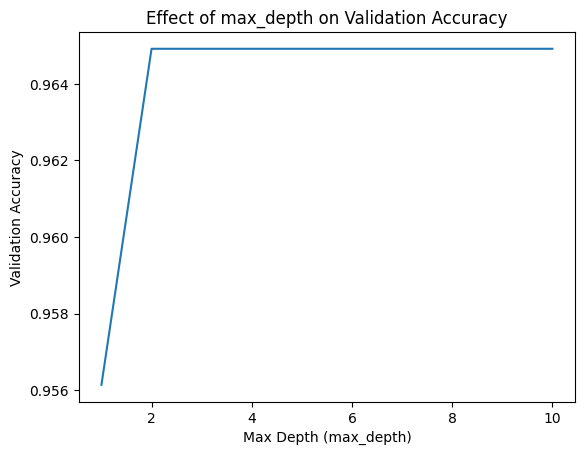

In [10]:
# plotting max_depth vs validation accuracies

plt.plot(depths, rf_val_accuracies)
plt.xlabel("Max Depth (max_depth)")
plt.ylabel("Validation Accuracy")
plt.title("Effect of max_depth on Validation Accuracy")
plt.show()


In [11]:
## observations: 
#1. validation accuracy is higest for max_depth=None and max_depth>=5
#2. its pretty much constant after 5

In [12]:
# using max_features

features = ['sqrt', 'log2']
rf_val_accuracies = []

for f in features:

    rf = RandomForestClassifier(max_features=f, random_state=42)
    rf.fit(X_train, y_train)

    rf_train_pred = rf.predict(X_train)
    rf_val_pred = rf.predict(X_val)

    rf_train_pred_accuracy = accuracy_score(y_train, rf_train_pred)
    rf_val_pred_accuracy = accuracy_score(y_val, rf_val_pred)

    rf_val_accuracies.append(rf_val_pred_accuracy)
    print(f"max_features: {f}, Validation Accuracy: {rf_val_pred_accuracy}")


max_features: sqrt, Validation Accuracy: 0.9649122807017544
max_features: log2, Validation Accuracy: 0.9649122807017544


In [13]:
## observations:
#1. both have same validation accuracy of 0.9649 (use either)

In [16]:
## comparing validation score with oob score

rf = RandomForestClassifier(oob_score=True, random_state=42)
rf.fit(X_train, y_train)    
print("OOB Score:", rf.oob_score_)



OOB Score: 0.9560439560439561


In [17]:
## observation: 
#1. oob score and validation score are pretty close (same)
#2. this means we can use oob score to evaluate our model without needing a separate validation set, which is useful when we have limited data

In [14]:
## implementing rf with best hyperparameters:
# best accuracy without hyperparameter tuning is

rf = RandomForestClassifier(n_estimators=50, max_depth=5, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)

y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_val_accuracy = accuracy_score(y_val, y_val_pred)

y_train_f1 = f1_score(y_train, y_train_pred)
y_val_f1 = f1_score(y_val, y_val_pred)

y_train_roc_auc = roc_auc_score(y_train, y_train_pred)
y_val_roc_auc = roc_auc_score(y_val, y_val_pred)

print("Random Forest with Hyperparameters - Train Accuracy:", y_train_accuracy)
print("Random Forest with Hyperparameters - Validation Accuracy:", y_val_accuracy)

print("Random Forest with Hyperparameters - Train F1 Score:", y_train_f1)
print("Random Forest with Hyperparameters - Validation F1 Score:", y_val_f1)

print("Random Forest with Hyperparameters - Train ROC AUC Score:", y_train_roc_auc)
print("Random Forest with Hyperparameters - Validation ROC AUC Score:", y_val_roc_auc)

Random Forest with Hyperparameters - Train Accuracy: 0.9934065934065934
Random Forest with Hyperparameters - Validation Accuracy: 0.9649122807017544
Random Forest with Hyperparameters - Train F1 Score: 0.9947826086956522
Random Forest with Hyperparameters - Validation F1 Score: 0.9722222222222222
Random Forest with Hyperparameters - Train ROC AUC Score: 0.9911242603550297
Random Forest with Hyperparameters - Validation ROC AUC Score: 0.9580740255486406


In [18]:
## observations:
#1. validation accuracy is same as baseline rf (0.9649) but train accuracy is lower (0.9912 vs 1.0), which means we have reduced overfitting compared to baseline rf
#2. f1 and roc auc scores are also same as baseline rf, which means we have achieved same performance with less overfitting, which is good

In [20]:
# train vs validation gap table for full tree, limited tree, rf and rf with hyperparameters
import pandas as pd 

gap_table = pd.DataFrame({
    "Model": ["Full Tree", "Limited Tree", "RF", "RF with Hyperparameters"],
    "Train Accuracy": [y_train_pred_full_accuracy, y_train_pred_limited_accuracy, y_train_pred_rf_accuracy, y_train_accuracy],
    "Validation Accuracy": [y_val_pred_full_accuracy, y_val_pred_limited_accuracy, y_val_pred_rf_accuracy, y_val_accuracy],
    "Gap": [y_train_pred_full_accuracy - y_val_pred_full_accuracy, 
            y_train_pred_limited_accuracy - y_val_pred_limited_accuracy, 
            y_train_pred_rf_accuracy - y_val_pred_rf_accuracy, 
            y_train_accuracy - y_val_accuracy]
})

gap_table

,Model,Train Accuracy,Validation Accuracy,Gap
0,Full Tree,1.000000,0.947368,0.052632
1,Limited Tree,0.978022,0.947368,0.030654
2,RF,1.000000,0.964912,0.035088
3,RF with Hyperparameters,0.993407,0.964912,0.028494
